Dosya henüz mevcut değil.
1. Görev ekle
2. Görevleri görüntüle
3. Bir görevi tamamla
4. Bir görevi sil
5. Rapor oluştur
6. Veriyi grafiğe dök
7. Çıkış
Görev başarıyla eklendi!
1. Görev ekle
2. Görevleri görüntüle
3. Bir görevi tamamla
4. Bir görevi sil
5. Rapor oluştur
6. Veriyi grafiğe dök
7. Çıkış
Görev başarıyla tamamlandı!
1. Görev ekle
2. Görevleri görüntüle
3. Bir görevi tamamla
4. Bir görevi sil
5. Rapor oluştur
6. Veriyi grafiğe dök
7. Çıkış


TypeError: 'value' must be an instance of str or bytes, not a float

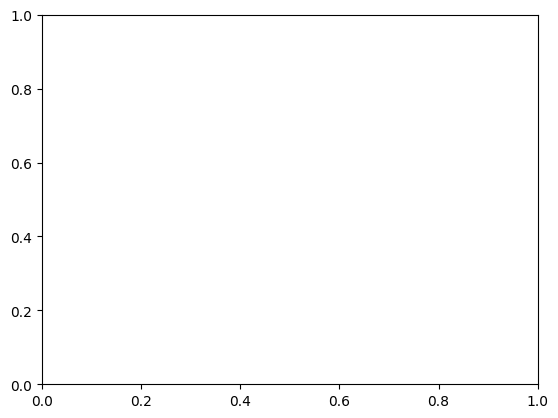

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class GörevListesi:
    def __init__(self, dosya_adi):
        self.dosya_adi = dosya_adi
        self.veri = pd.DataFrame(columns=['görev', 'kategori', 'bitis_tarihi', 'durum'])

    def veriyi_yükle(self):
        try:
            self.veri = pd.read_csv(self.dosya_adi)
        except FileNotFoundError:
            print("Dosya henüz mevcut değil.")

    def veriyi_kaydet(self):
        self.veri.to_csv(self.dosya_adi, index=False)

    def görev_ekle(self, görev, kategori, bitis_tarihi):
        yeni_görev = pd.DataFrame({'görev': [görev], 'kategori': [kategori], 'bitis_tarihi': [bitis_tarihi], 'durum': ['Tamamlanmadı']})
        self.veri = pd.concat([self.veri, yeni_görev], ignore_index=True)

    def görevleri_görüntüle(self):
        print(self.veri)

    def görevi_tamamla(self, görev_indeksi):
        try:
            self.veri.loc[görev_indeksi, 'durum'] = 'Tamamlandı'
        except IndexError:
            print("Görev indeksi geçerli değil.")

    def görevi_sil(self, görev_indeksi):
        try:
            self.veri.drop(görev_indeksi, inplace=True)
        except IndexError:
            print("Görev indeksi geçerli değil.")

    def rapor_oluştur(self):
        print("Kategoriye göre görev sayısı:")
        print(self.veri.groupby('kategori').size())
        print("\n")
        print("Bugün tamamlanan görev sayısı:")
        bugün = datetime.now().strftime('%Y-%m-%d')
        print(self.veri[(self.veri['durum'] == 'Tamamlandı') & (self.veri['bitis_tarihi'] == bugün)].shape[0])
        print("\n")
        print("Bu hafta tamamlanan görev sayısı:")
        haftanın_ilk_günü = datetime.now() - timedelta(days=datetime.now().weekday())
        haftanın_son_günü = haftanın_ilk_günü + timedelta(days=6)
        print(self.veri[(self.veri['durum'] == 'Tamamlandı') & (self.veri['bitis_tarihi'] >= haftanın_ilk_günü.strftime('%Y-%m-%d')) & (self.veri['bitis_tarihi'] <= haftanın_son_günü.strftime('%Y-%m-%d'))].shape[0])
        print("\n")
        print("Duruma göre görevler:")
        print(self.veri.groupby('durum').size())

    def veriyi_grafige_dok(self):
        kategoriler = self.veri['kategori'].unique()
        sayılar = []
        for kategori in kategoriler:
            sayılar.append(self.veri[self.veri['kategori'] == kategori].shape[0])
        plt.bar(kategoriler, sayılar)
        plt.title('Kategoriye Göre Görev Sayısı')
        plt.xlabel('Kategori')
        plt.ylabel('Görev Sayısı')
        plt.show()

if __name__ == "__main__":
    dosya_adi = 'gorev_listesi.csv'
    liste = GörevListesi(dosya_adi)
    liste.veriyi_yükle()
    while True:
        print("1. Görev ekle")
        print("2. Görevleri görüntüle")
        print("3. Bir görevi tamamla")
        print("4. Bir görevi sil")
        print("5. Rapor oluştur")
        print("6. Veriyi grafiğe dök")
        print("7. Çıkış")
        secim = input("Seçiminizi girin (1-7): ")
        if secim == '1':
            görev = input("Görev adını girin: ")
            kategori = input("Görev kategorisini girin: ")
            bitis_tarihi = input("Bitiş tarihini girin (YYYY-AA-GG): ")
            liste.görev_ekle(görev, kategori, bitis_tarihi)
            liste.veriyi_kaydet()
            print("Görev başarıyla eklendi!")
        elif secim == '2':
            liste.görevleri_görüntüle()
        elif secim == '3':
            görev_indeksi = int(input("Tamamlanacak/silinecek görevin indeksini girin: "))
            if secim == '3':
                liste.görevi_tamamla(görev_indeksi)
                liste.veriyi_kaydet()
                print("Görev başarıyla tamamlandı!")
            elif secim == '4':
                liste.görevi_sil(görev_indeksi)
                liste.veriyi_kaydet()
                print("Görev başarıyla silindi!")
        elif secim == '5':
            liste.rapor_oluştur()
        elif secim == '6':
            liste.veriyi_grafige_dok()
        elif secim == '7':
            print("Görüşmek üzere!")
            break
        else:
            print("Geçersiz seçim. Lütfen 1 ile 7 arasında bir sayı girin.")

